In [1]:
import numpy as np
import pandas as pd

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Feature Selection

### 1. Univariate selection

---> uses chi-squared statistical test for non-negative features to select 10 od the best features

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [7]:
X = train.iloc[:,0:20]
y = train.iloc[:,-1]

In [8]:
bestFeatures = SelectKBest(score_func=chi2, k=10)

In [9]:
fit = bestFeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [14]:
dfcolumns

,0
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc
5,four_g
6,int_memory
7,m_dep
8,mobile_wt
9,n_cores


In [11]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [12]:
print(featureScores.nlargest(10,'Score'))

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


### 2. Feature Importance

Feature Importance gives a score for each feature of data. The higher the score, more important (relevant) the feature, towards the output variable, is.

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.06427301 0.02307333 0.03321478 0.01991385 0.03394523 0.01871807
 0.03523132 0.0333013  0.03466732 0.03163826 0.03283748 0.04759213
 0.05106434 0.37239678 0.03595927 0.03833666 0.03656854 0.01387363
 0.02280217 0.02059253]


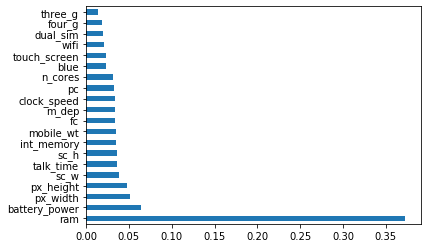

In [17]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(100).plot(kind='barh')
plt.show()